In [1]:
import sys
sys.path.append("../")  # add parent directory to the system path
from utils_data import *
from utils_model import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from time import time

2023-10-01 18:56:03.529775: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 18:56:04.244767: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Get data ready

In [2]:
# get the data ready
root_name = "Research"
train_path, test_path, val_path = make_data_path(root_name=root_name)

DataGenerator = ImageDataGenerator(rescale=1.0 / 255)
train_data, test_data, val_data = make_data_ready(
    DataGenerator, train_path, test_path, val_path
)

Found 84479 images belonging to 524 classes.
Found 2620 images belonging to 524 classes.
Found 2620 images belonging to 524 classes.


## Load chosen model and apply on test data

In [3]:
chosen_model = tf.keras.models.load_model("../models/save_best_models/best_model_mobilenet_test6.h5")

2023-10-01 18:56:11.810796: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-01 18:56:11.846484: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-01 18:56:11.846870: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-01 18:56:11.847908: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-01 18:56:11.848344: I tensorflow/compile

In [4]:
# __________ TEST FOR JUST ONE BATCH OF TEST DATA TO SEE HOW TO CODE WORK _________ #
import numpy as np 
from itertools import islice  

predictions = []  # to store predictions
true_labels = []  # to store true labels

# create an iterator that takes only the first 10 batches (samples)
num_batches_to_process = 1
limited_test_data = islice(test_data, num_batches_to_process)

for batch_images, batch_labels in limited_test_data:
    # make predictions on the current batch of images
    batch_predictions = chosen_model.predict(batch_images)
    
    # append the batch predictions and true labels
    predictions.extend(batch_predictions)
    true_labels.extend(np.argmax(batch_labels, axis=1))

# convert predictions and true labels to NumPy arrays for easier manipulation
predictions = np.array(predictions)
true_labels = np.array(true_labels)

2023-10-01 18:56:14.864472: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-01 18:56:15.553495: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 2s 2s/step


### Test full the test_data

In [5]:
num_batches = len(test_data)
print(f"Number of batches: {num_batches}")
print(len(test_data[0][0]))

Number of batches: 82
32


In [6]:
# print the dimensions of test_data
for key, value in test_data.__dict__.items():
    print(f"{key}: {value}")

image_data_generator: <keras.src.preprocessing.image.ImageDataGenerator object at 0x7f824df54640>
target_size: (224, 224)
keep_aspect_ratio: False
color_mode: rgb
data_format: channels_last
image_shape: (224, 224, 3)
save_to_dir: None
save_prefix: 
save_format: png
interpolation: nearest
split: None
subset: None
directory: /home/hoangng/Projects/Bird_classification/Research/input/data/test
classes: [  0   0   0 ... 523 523 523]
class_mode: categorical
dtype: float32
samples: 2620
num_classes: 524
class_indices: {'ABBOTTS BABBLER': 0, 'ABBOTTS BOOBY': 1, 'ABYSSINIAN GROUND HORNBILL': 2, 'AFRICAN CROWNED CRANE': 3, 'AFRICAN EMERALD CUCKOO': 4, 'AFRICAN FIREFINCH': 5, 'AFRICAN OYSTER CATCHER': 6, 'AFRICAN PIED HORNBILL': 7, 'AFRICAN PYGMY GOOSE': 8, 'ALBATROSS': 9, 'ALBERTS TOWHEE': 10, 'ALEXANDRINE PARAKEET': 11, 'ALPINE CHOUGH': 12, 'ALTAMIRA YELLOWTHROAT': 13, 'AMERICAN AVOCET': 14, 'AMERICAN BITTERN': 15, 'AMERICAN COOT': 16, 'AMERICAN DIPPER': 17, 'AMERICAN FLAMINGO': 18, 'AMERICAN G

In [7]:
print(np.argmax(np.array(chosen_model.predict(np.expand_dims(test_data[0][0][0], axis=0)))))

1/1 [==============================] - 1s 601ms/step
155


In [8]:
print(np.argmax(test_data[0][1][0])) # order: batch number ; image|label ; image number - the np.argmax is to get the index of whatever element has the best value amongst the elements in the image (i.e., the matrices)

155


In [9]:
# _____________ Test full the test_data
import numpy as np 

predictions = []  # to store predictions
true_labels = []  # to store true labels

for i in range(len(test_data)):
    
    batch_index = [i]
    print(f"The batch index is {batch_index}" )
    
    # iterate through the current batch
    for j in range(len(test_data[i][0])):        
        
        print(f"The image is of the image {j} in batch {i}")
        print(f"The shape of the image is {test_data[i][0][j].shape}")        
        
        input_image = np.expand_dims(test_data[i][0][j], axis=0)
        
        image_prediction = chosen_model.predict(input_image)
        print(f"The prediction is of the image {j} in batch {i}")
        
        print("------------------------------ END TEST OF ONE IMAGE ------------------------------ ")
        
        # append the prediction and true label
        predictions.append(image_prediction)
        true_labels.append(np.argmax(test_data[i][1][j]))
        
        

# convert predictions and true labels to NumPy arrays for easier manipulation
predictions = np.array(predictions)
true_labels = np.array(true_labels)

The batch index is [0]
The image is of the image 0 in batch 0
The shape of the image is (224, 224, 3)
1/1 [==============================] - 0s 18ms/step
The prediction is of the image 0 in batch 0
------------------------------ END TEST OF ONE IMAGE ------------------------------ 
The image is of the image 1 in batch 0
The shape of the image is (224, 224, 3)
1/1 [==============================] - 0s 19ms/step
The prediction is of the image 1 in batch 0
------------------------------ END TEST OF ONE IMAGE ------------------------------ 
The image is of the image 2 in batch 0
The shape of the image is (224, 224, 3)
1/1 [==============================] - 0s 24ms/step
The prediction is of the image 2 in batch 0
------------------------------ END TEST OF ONE IMAGE ------------------------------ 
The image is of the image 3 in batch 0
The shape of the image is (224, 224, 3)
1/1 [==============================] - 0s 18ms/step
The prediction is of the image 3 in batch 0
----------------------

In [10]:
print( np.argmax(predictions[0]) )
print(true_labels[0])
print(range(len(true_labels)))
# print(predictions)

155
155
range(0, 2620)


In [11]:
correct_predictions = []
incorrect_predictions = []

for i in range(len(true_labels)):
    true_label = true_labels[i]
    predicted_probabilities = predictions[i]
    
    # find the class with the highest predicted probability
    predicted_label = np.argmax(predicted_probabilities)
    
    if true_label == predicted_label:
        correct_predictions.append((predicted_probabilities, true_label))
    else:
        incorrect_predictions.append((predicted_probabilities, true_label))

In [12]:
print(len(correct_predictions))
print(len(incorrect_predictions))
print(np.argmax(correct_predictions[0][0]))
print((correct_predictions[0][1]))

2471
149
155
155


In [13]:
print(np.argmax(correct_predictions[0][0])) # predicted_probabilities ; image | label ; 

155


In [14]:
# _______ TRACK THE INDEX OF THE WORST CASE IN CORRECT PREDICTION _______ #
best_of_predicted_probabilities = []

# initialize variables to keep track of the worst probability and its index in correct_predictions
worst_probability_in_correct_prediction = np.inf
worst_probability_index = -1

for i, (predicted_probabilities, _) in enumerate(correct_predictions):
    best_probability = np.max(predicted_probabilities)  # best probability
    best_of_predicted_probabilities.append(best_probability)

    # check if this is the worst probability among the best probabilities
    if best_probability < worst_probability_in_correct_prediction:
        worst_probability_in_correct_prediction = best_probability
        worst_probability_index = i

# calculate the batch and image indices from worst_probability_index
batch_index = worst_probability_index // len(test_data[0][0])  # calculate the batch index
image_index_within_batch = worst_probability_index % len(test_data[0][0])  # calculate the image index within the batch

# print the worst probability, batch index, and image index within the batch
print("Worst Probability in Correct Prediction:", worst_probability_in_correct_prediction)
print("Index of Worst Probability in Correct Prediction:", worst_probability_index)
print("Batch Index of Worst Probability:", batch_index)
print("Image Index within Batch:", image_index_within_batch)

Worst Probability in Correct Prediction: 0.11719328
Index of Worst Probability in Correct Prediction: 1053
Batch Index of Worst Probability: 32
Image Index within Batch: 29


In [15]:
# initialize variables to keep track of the worst probabilities and their indices in correct_predictions
num_worst_cases = 16  # number of worst cases to track
worst_probabilities = [np.inf] * num_worst_cases
worst_probability_indices = [-1] * num_worst_cases

for i, (predicted_probabilities, _) in enumerate(correct_predictions):
    best_probability = np.max(predicted_probabilities)  # best probability

    # check if this is one of the worst probabilities among the best probabilities
    for j in range(num_worst_cases):
        if best_probability < worst_probabilities[j]:
            worst_probabilities[j] = best_probability
            worst_probability_indices[j] = i
            break

# calculate the batch and image indices for the worst cases
worst_cases_info = []

for worst_probability_index in worst_probability_indices:
    if worst_probability_index != -1:
        batch_index = worst_probability_index // len(test_data[0][0])  # calculate the batch index
        image_index_within_batch = worst_probability_index % len(test_data[0][0])  # calculate the image index within the batch
        worst_cases_info.append((worst_probabilities[worst_probability_indices.index(worst_probability_index)], batch_index, image_index_within_batch))

# sort the worst cases by probability in ascending order
worst_cases_info.sort(key=lambda x: x[0])

# print information about the worst cases, including their worst probabilities, batch indices, and image indices within the batch
for idx, (worst_probability, batch_index, image_index_within_batch) in enumerate(worst_cases_info):
    print(f"Worst probability {idx + 1} in correct prediction:", worst_probability)
    print(f"Batch index of worst probability {idx + 1}:", batch_index)
    print(f"Image index within its batch:", image_index_within_batch)
    print()

Worst probability 1 in correct prediction: 0.11719328
Batch index of worst probability 1: 32
Image index within its batch: 29

Worst probability 2 in correct prediction: 0.17587174
Batch index of worst probability 2: 11
Image index within its batch: 1

Worst probability 3 in correct prediction: 0.19061604
Batch index of worst probability 3: 35
Image index within its batch: 27

Worst probability 4 in correct prediction: 0.19120224
Batch index of worst probability 4: 76
Image index within its batch: 22

Worst probability 5 in correct prediction: 0.25823906
Batch index of worst probability 5: 53
Image index within its batch: 28

Worst probability 6 in correct prediction: 0.25930032
Batch index of worst probability 6: 58
Image index within its batch: 28

Worst probability 7 in correct prediction: 0.27940992
Batch index of worst probability 7: 76
Image index within its batch: 16

Worst probability 8 in correct prediction: 0.3219954
Batch index of worst probability 8: 48
Image index within i

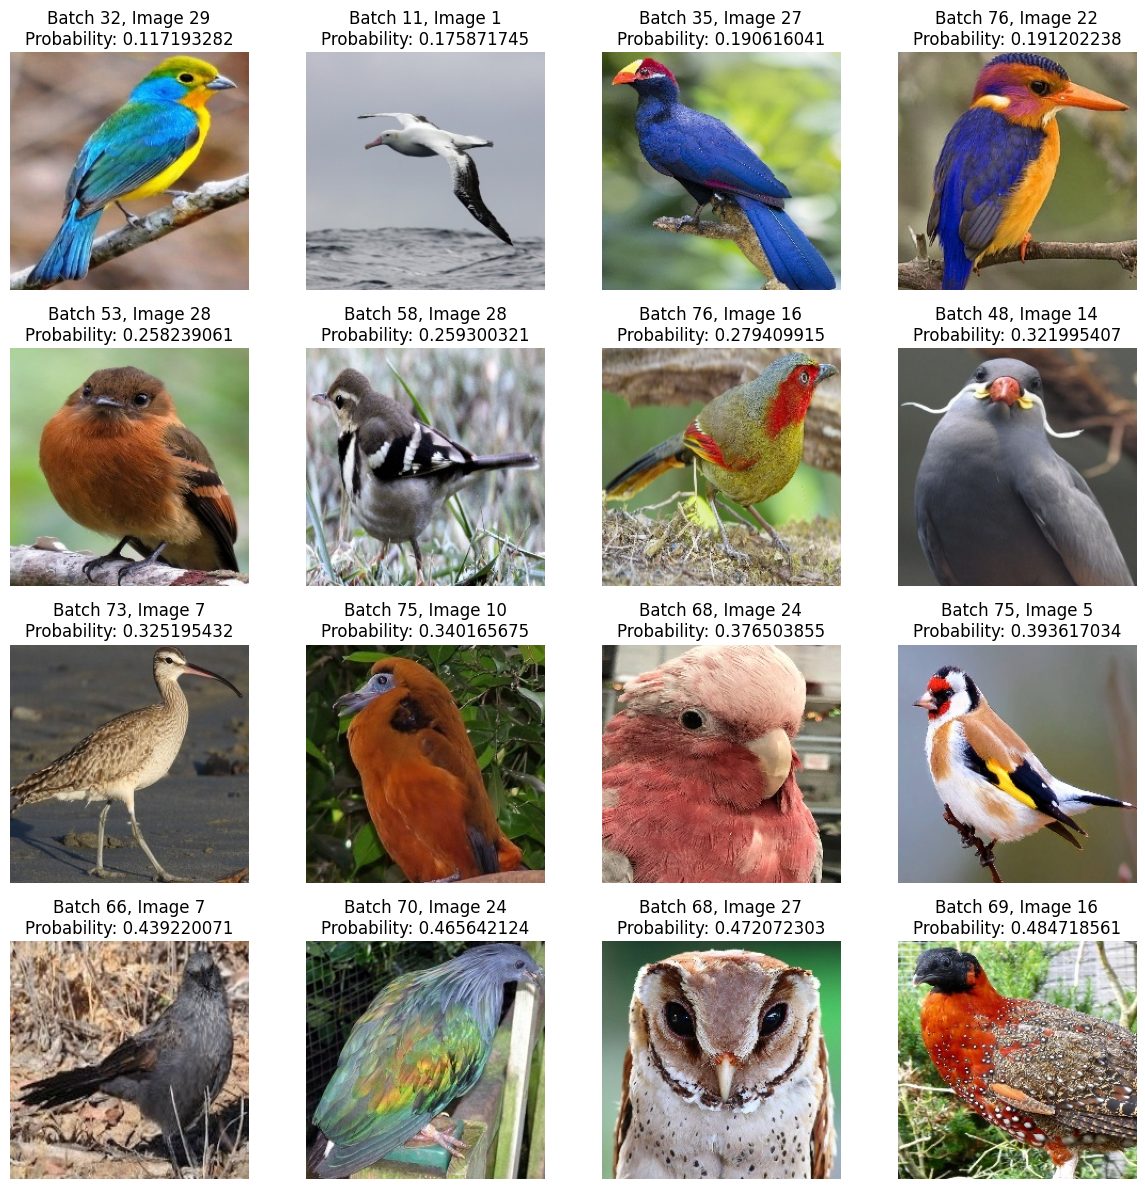

In [16]:
plt.figure(figsize=(12, 12))

# Iterate through the worst cases and display them in a 3x4 grid
for idx, (worst_probability, batch_index, image_index_within_batch) in enumerate(worst_cases_info):
    plt.subplot(4, 4, idx + 1)  # Create a subplot in a 3x4 grid
    plt.imshow(test_data[batch_index][0][image_index_within_batch])  # Display the image
    plt.title(f"Batch {batch_index}, Image {image_index_within_batch}\nProbability: {worst_probability:.9f}")
    plt.axis('off')  # Turn off axes

# Show the plot with the worst cases
plt.tight_layout()
plt.show()

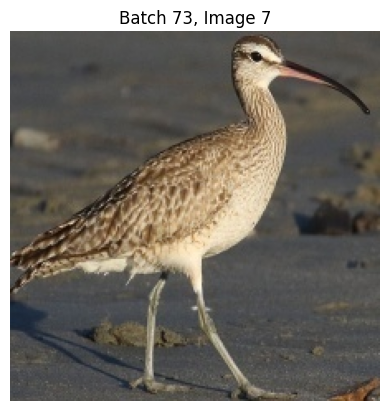

In [17]:
import matplotlib.pyplot as plt

# Define the batch number and image number within the batch
batch_number = 73  # Replace with the desired batch number (0-based index)
image_number_within_batch = 7  # Replace with the desired image number within the batch (0-based index)

# Retrieve the image from test_data based on the batch and image number
image = test_data[batch_number][0][image_number_within_batch]

# Display the image using Matplotlib
plt.imshow(image)
plt.title(f"Batch {batch_number}, Image {image_number_within_batch}")
plt.axis('off')
plt.show()


In [18]:
# Initialize variables to keep track of the best probabilities and their indices in correct_predictions
num_best_cases = 16  # Number of best cases to track
best_probabilities = [-np.inf] * num_best_cases
best_probability_indices = [-1] * num_best_cases

# Iterate through the correct predictions and track the best probabilities
for i, (predicted_probabilities, _) in enumerate(correct_predictions):
    best_probability = np.max(predicted_probabilities)  # best probability

    # Check if this is one of the best probabilities among the correct predictions
    for j in range(num_best_cases):
        if best_probability > best_probabilities[j]:
            best_probabilities.insert(j, best_probability)
            best_probability_indices.insert(j, i)
            best_probabilities.pop()
            best_probability_indices.pop()
            break

# Calculate the batch and image indices for the best cases
best_cases_info = []

for best_probability_index in best_probability_indices:
    if best_probability_index != -1:
        batch_index = best_probability_index // len(test_data[0][0])  # Calculate the batch index
        image_index_within_batch = best_probability_index % len(test_data[0][0])  # Calculate the image index within the batch
        best_cases_info.append((best_probabilities[best_probability_indices.index(best_probability_index)], batch_index, image_index_within_batch))

# Sort the best cases by probability in descending order
best_cases_info.sort(reverse=True, key=lambda x: x[0])

# Print information about the 9 best cases, including their best probabilities, batch indices, and image indices within the batch
for idx, (best_probability, batch_index, image_index_within_batch) in enumerate(best_cases_info):
    print(f"Best Probability {idx + 1} in Correct Prediction:", best_probability)
    print(f"Batch Index of Best Probability {idx + 1}:", batch_index)
    print(f"Image Index within Batch {idx + 1}:", image_index_within_batch)
    print()

Best Probability 1 in Correct Prediction: 0.9999999
Batch Index of Best Probability 1: 42
Image Index within Batch 1: 18

Best Probability 2 in Correct Prediction: 0.99999976
Batch Index of Best Probability 2: 10
Image Index within Batch 2: 20

Best Probability 3 in Correct Prediction: 0.99999964
Batch Index of Best Probability 3: 70
Image Index within Batch 3: 19

Best Probability 4 in Correct Prediction: 0.9999989
Batch Index of Best Probability 4: 39
Image Index within Batch 4: 18

Best Probability 5 in Correct Prediction: 0.9999981
Batch Index of Best Probability 5: 4
Image Index within Batch 5: 20

Best Probability 6 in Correct Prediction: 0.99999785
Batch Index of Best Probability 6: 16
Image Index within Batch 6: 28

Best Probability 7 in Correct Prediction: 0.99999726
Batch Index of Best Probability 7: 74
Image Index within Batch 7: 0

Best Probability 8 in Correct Prediction: 0.999997
Batch Index of Best Probability 8: 41
Image Index within Batch 8: 9

Best Probability 9 in Co

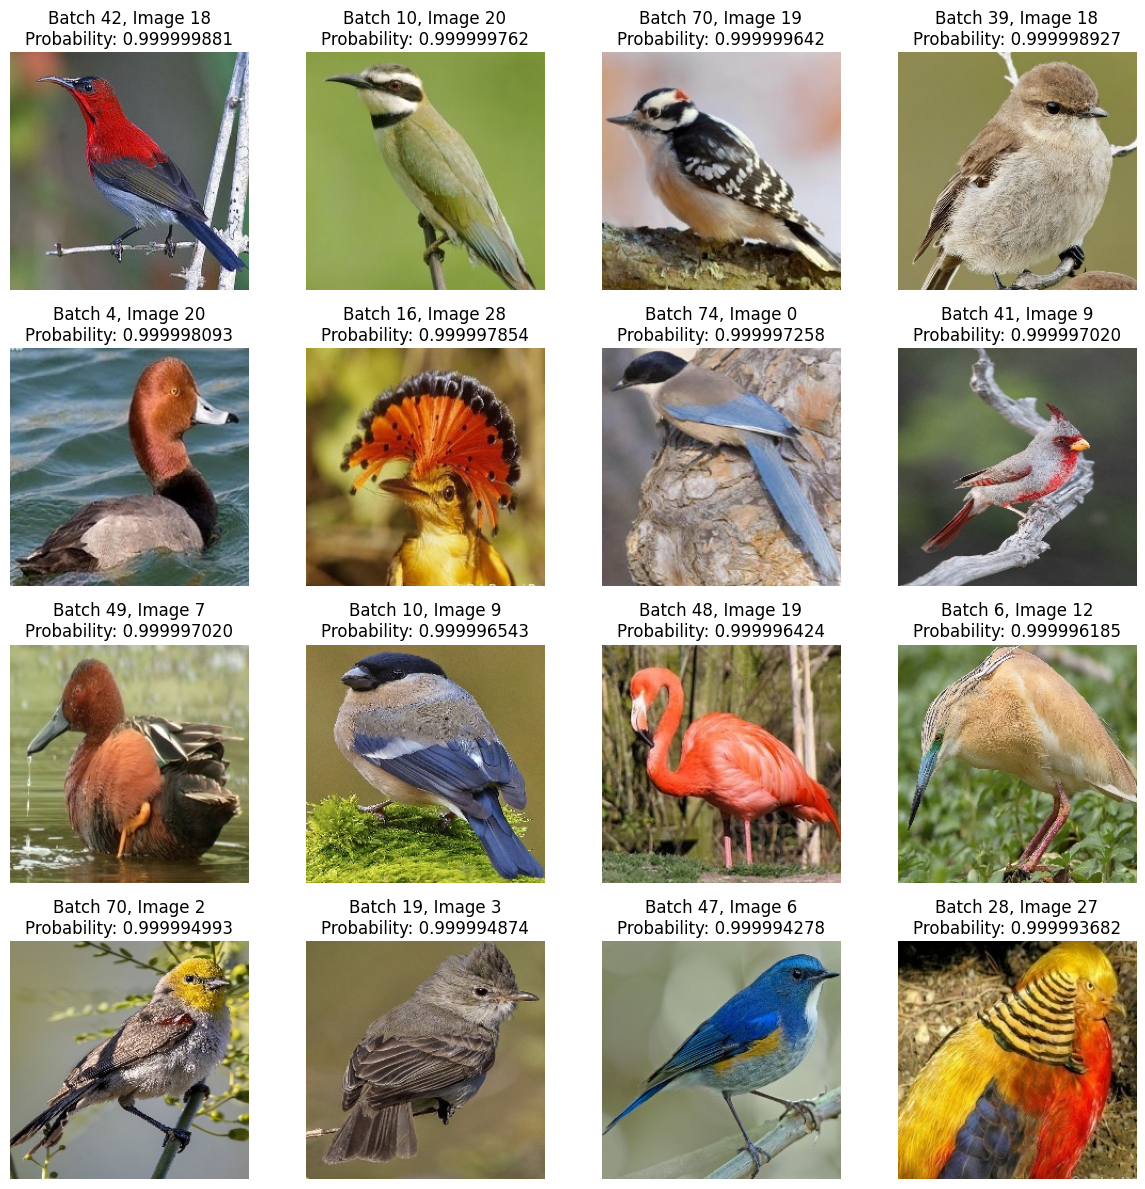

In [19]:
plt.figure(figsize=(12, 12))

# Iterate through the worst cases and display them in a 3x4 grid
for idx, (best_probability, batch_index, image_index_within_batch) in enumerate(best_cases_info):
    plt.subplot(4, 4, idx + 1)  # Create a subplot in a 3x4 grid
    plt.imshow(test_data[batch_index][0][image_index_within_batch])  # Display the image
    plt.title(f"Batch {batch_index}, Image {image_index_within_batch}\nProbability: {best_probability:.9f}")
    plt.axis('off')  # Turn off axes

# Show the plot with the worst cases
plt.tight_layout()
plt.show()

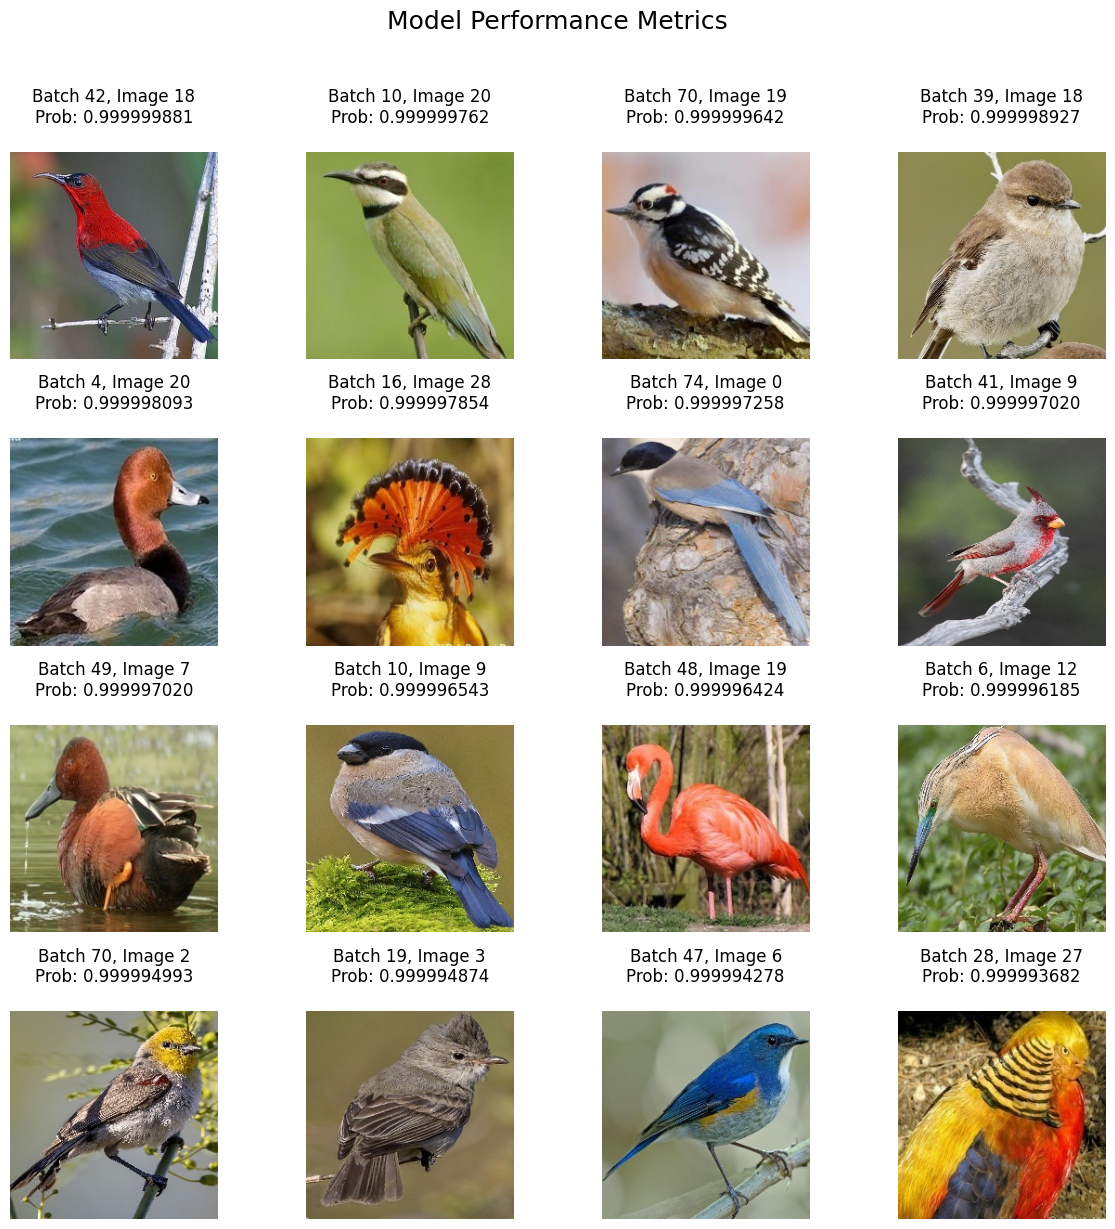

In [20]:
# Set up the subplots for visualization
nrows = 4  # Number of rows
ncols = 4  # Number of columns
figsize = (12, 12)  # Figure size
fontsize = 12  # Font size

# Create subplots
fig, axes = plt.subplots(
    nrows, ncols, figsize=figsize, squeeze=False
)  # Ensure axes is always a 2D array
fig.suptitle("Model Performance Metrics", fontsize=fontsize * 1.5, y=1.02)

# Iterate through the best cases and display them in subplots
for idx, (best_probability, batch_index, image_index_within_batch) in enumerate(best_cases_info):
    row = idx // ncols  # Calculate the row index
    col = idx % ncols  # Calculate the column index

    ax = axes[row, col]  # Get the current subplot

    # Display the image
    ax.imshow(test_data[batch_index][0][image_index_within_batch])
    ax.set_title(f"Batch {batch_index}, Image {image_index_within_batch}\nProb: {best_probability:.9f}\n")
    ax.axis('off')  # Turn off axes

# Ensure tight layout and show the plot
plt.tight_layout()
plt.show()